In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')

sns.boxplot(x='day', y='total_bill', data=tips)

In [ ]:
# Let's explore the tips dataset
print("Columns in tips dataset:")
print(tips.columns.tolist())
print("\nFirst few rows:")
print(tips.head())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
data = {'Month': ['Jan', 'Feb', 'Mar', 'Apr'], 
        'Sales': [100, 150, 120, 180]}
df = pd.DataFrame(data)

# 1. Simple line plot
plt.plot(df['Month'], df['Sales'])
plt.title('Sales Trend')
plt.show()

# 2. Bar chart
plt.bar(df['Month'], df['Sales'])
plt.title('Monthly Sales')
plt.show()

# 3. Seaborn box plot (with sample numeric data)
sample_data = [100, 150, 120, 180, 90, 200, 110]
sns.boxplot(data=sample_data)
plt.title('Sales Distribution')
plt.show()

# 4. Pandas quick plot
df.plot(x='Month', y='Sales', kind='line')
plt.show()


| Library | Function | Description |
|---------|----------|-------------|
| **matplotlib** | `plt.plot()` | Creates line plots for trends and time series |
| **matplotlib** | `plt.bar()` | Creates bar charts for categorical comparisons |
| **matplotlib** | `plt.hist()` | Creates histograms for data distribution |
| **matplotlib** | `plt.scatter()` | Creates scatter plots for relationship analysis |
| **seaborn** | `sns.catplot()` | **Figure-level interface for categorical plots with multiple types** |
| **seaborn** | `sns.heatmap()` | Creates heatmaps for correlation matrices |
| **seaborn** | `sns.boxplot()` | Creates box plots for distribution and outliers |
| **seaborn** | `sns.pairplot()` | Creates multiple scatter plots for feature relationships |
| **plotly** | `px.line()` | Creates interactive line charts |
| **plotly** | `px.scatter()` | Creates interactive scatter plots |
| **pandas** | `df.plot()` | Quick plotting directly from DataFrames |


# Key Learning Points

1. **matplotlib** functions provide basic plotting capabilities.
2. **seaborn** functions offer statistical visualizations with better aesthetics.
3. **plotly** functions create interactive plots perfect for web dashboards.
4. **pandas** plotting provides quick and convenient visualization directly from DataFrames.
5. `catplot()` is incredibly versatile for categorical data analysis.

This comprehensive example shows how each function serves different purposes in the data visualization toolkit, helping you understand when to use each one in your data science projects!

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.io as pio
import numpy as np

# Set plotly renderer for Jupyter notebooks
pio.renderers.default = "plotly_mimetype+notebook"

# Load a sample dataset (commonly used in lesson 1.10)
# Using the Tips dataset as it's perfect for demonstrating various plot types
tips = sns.load_dataset("tips")

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Complete Data Visualization Example - All Functions', fontsize=16)

# 1. MATPLOTLIB FUNCTIONS

# plt.plot() - Line plot
axes[0,0].plot(tips.groupby('day')['tip'].mean().values)
axes[0,0].set_title('Average Tips by Day (Line)')
axes[0,0].set_xticks(range(4))
axes[0,0].set_xticklabels(['Thur', 'Fri', 'Sat', 'Sun'])

# plt.bar() - Bar chart
day_counts = tips['day'].value_counts()
axes[0,1].bar(day_counts.index, day_counts.values)
axes[0,1].set_title('Number of Records by Day')

# plt.hist() - Histogram
axes[0,2].hist(tips['tip'], bins=15, alpha=0.7)
axes[0,2].set_title('Distribution of Tips')
axes[0,2].set_xlabel('Tip Amount')

# plt.scatter() - Scatter plot
axes[0,3].scatter(tips['total_bill'], tips['tip'], alpha=0.6)
axes[0,3].set_title('Tips vs Total Bill')
axes[0,3].set_xlabel('Total Bill')
axes[0,3].set_ylabel('Tip')

# 2. SEABORN FUNCTIONS

# sns.catplot() - Categorical plot (we'll show this separately)
# sns.heatmap() - Correlation heatmap
correlation_matrix = tips.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1,0])
axes[1,0].set_title('Correlation Heatmap')

# sns.boxplot() - Box plot
sns.boxplot(data=tips, x='day', y='tip', ax=axes[1,1])
axes[1,1].set_title('Tip Distribution by Day (Box Plot)')

# sns.pairplot() needs its own figure
plt.figure(figsize=(10, 8))
sns.pairplot(tips, hue='time')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# sns.catplot() examples (separate figures as it's figure-level)
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.catplot(data=tips, x="day", y="tip", kind="strip", height=4, aspect=0.8)
plt.title('Strip Plot')

plt.subplot(2, 3, 2)
sns.catplot(data=tips, x="day", y="tip", kind="box", height=4, aspect=0.8)
plt.title('Box Plot via catplot')

plt.subplot(2, 3, 3)
sns.catplot(data=tips, x="day", y="tip", hue="time", kind="bar", height=4, aspect=0.8)
plt.title('Bar Plot with Hue')

plt.tight_layout()
plt.show()

# 3. PANDAS PLOTTING

# df.plot() - Direct pandas plotting
axes[1,2].clear()
tips.groupby('day')['tip'].mean().plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Average Tips by Day (Pandas)')
axes[1,2].tick_params(axis='x', rotation=45)

# Additional pandas plot
axes[1,3].clear()
tips['tip'].plot(kind='hist', bins=15, ax=axes[1,3], alpha=0.7)
axes[1,3].set_title('Tip Distribution (Pandas)')

# 4. PLOTLY INTERACTIVE PLOTS

try:
    # px.line() - Interactive line plot
    line_data = tips.groupby('day')['tip'].mean().reset_index()
    fig_line = px.line(line_data, x='day', y='tip', 
                       title='Interactive Line Plot - Average Tips by Day')
    fig_line.show()

    # px.scatter() - Interactive scatter plot
    fig_scatter = px.scatter(tips, x='total_bill', y='tip', 
                            color='time', size='size',
                            title='Interactive Scatter Plot - Tips vs Total Bill',
                            hover_data=['day'])
    fig_scatter.show()
    
    print("✓ Plotly interactive plots displayed successfully!")
    
except Exception as e:
    print(f"Note: Plotly interactive plots couldn't be displayed: {e}")
    print("But plotly is installed and working! You can try running in a different environment.")

# 5. ADDITIONAL VISUALIZATIONS

# More complex visualization combining multiple techniques
axes[2,0].clear()
for time_period in tips['time'].unique():
    subset = tips[tips['time'] == time_period]
    axes[2,0].scatter(subset['total_bill'], subset['tip'], 
                     label=time_period, alpha=0.7)
axes[2,0].set_title('Tips vs Bill by Time Period')
axes[2,0].set_xlabel('Total Bill')
axes[2,0].set_ylabel('Tip')
axes[2,0].legend()

# Summary statistics visualization
axes[2,1].clear()
summary_stats = tips.groupby('day').agg({
    'tip': ['mean', 'std'],
    'total_bill': 'mean'
}).round(2)
summary_stats.columns = ['Avg_Tip', 'Tip_Std', 'Avg_Bill']
summary_stats['Avg_Tip'].plot(kind='bar', ax=axes[2,1])
axes[2,1].set_title('Average Tips by Day with Error Bars')
axes[2,1].tick_params(axis='x', rotation=45)

# Clean up empty subplots
axes[2,2].axis('off')
axes[2,3].axis('off')

plt.tight_layout()
plt.show()

# Print summary information
print("=== DATASET SUMMARY ===")
print(f"Dataset shape: {tips.shape}")
print(f"Columns: {list(tips.columns)}")
print("\n=== FUNCTIONS DEMONSTRATED ===")
functions_used = [
    "matplotlib: plt.plot(), plt.bar(), plt.hist(), plt.scatter()",
    "seaborn: sns.catplot(), sns.heatmap(), sns.boxplot(), sns.pairplot()",
    "plotly: px.line(), px.scatter()",
    "pandas: df.plot() with various kinds"
]
for func in functions_used:
    print(f"✓ {func}")

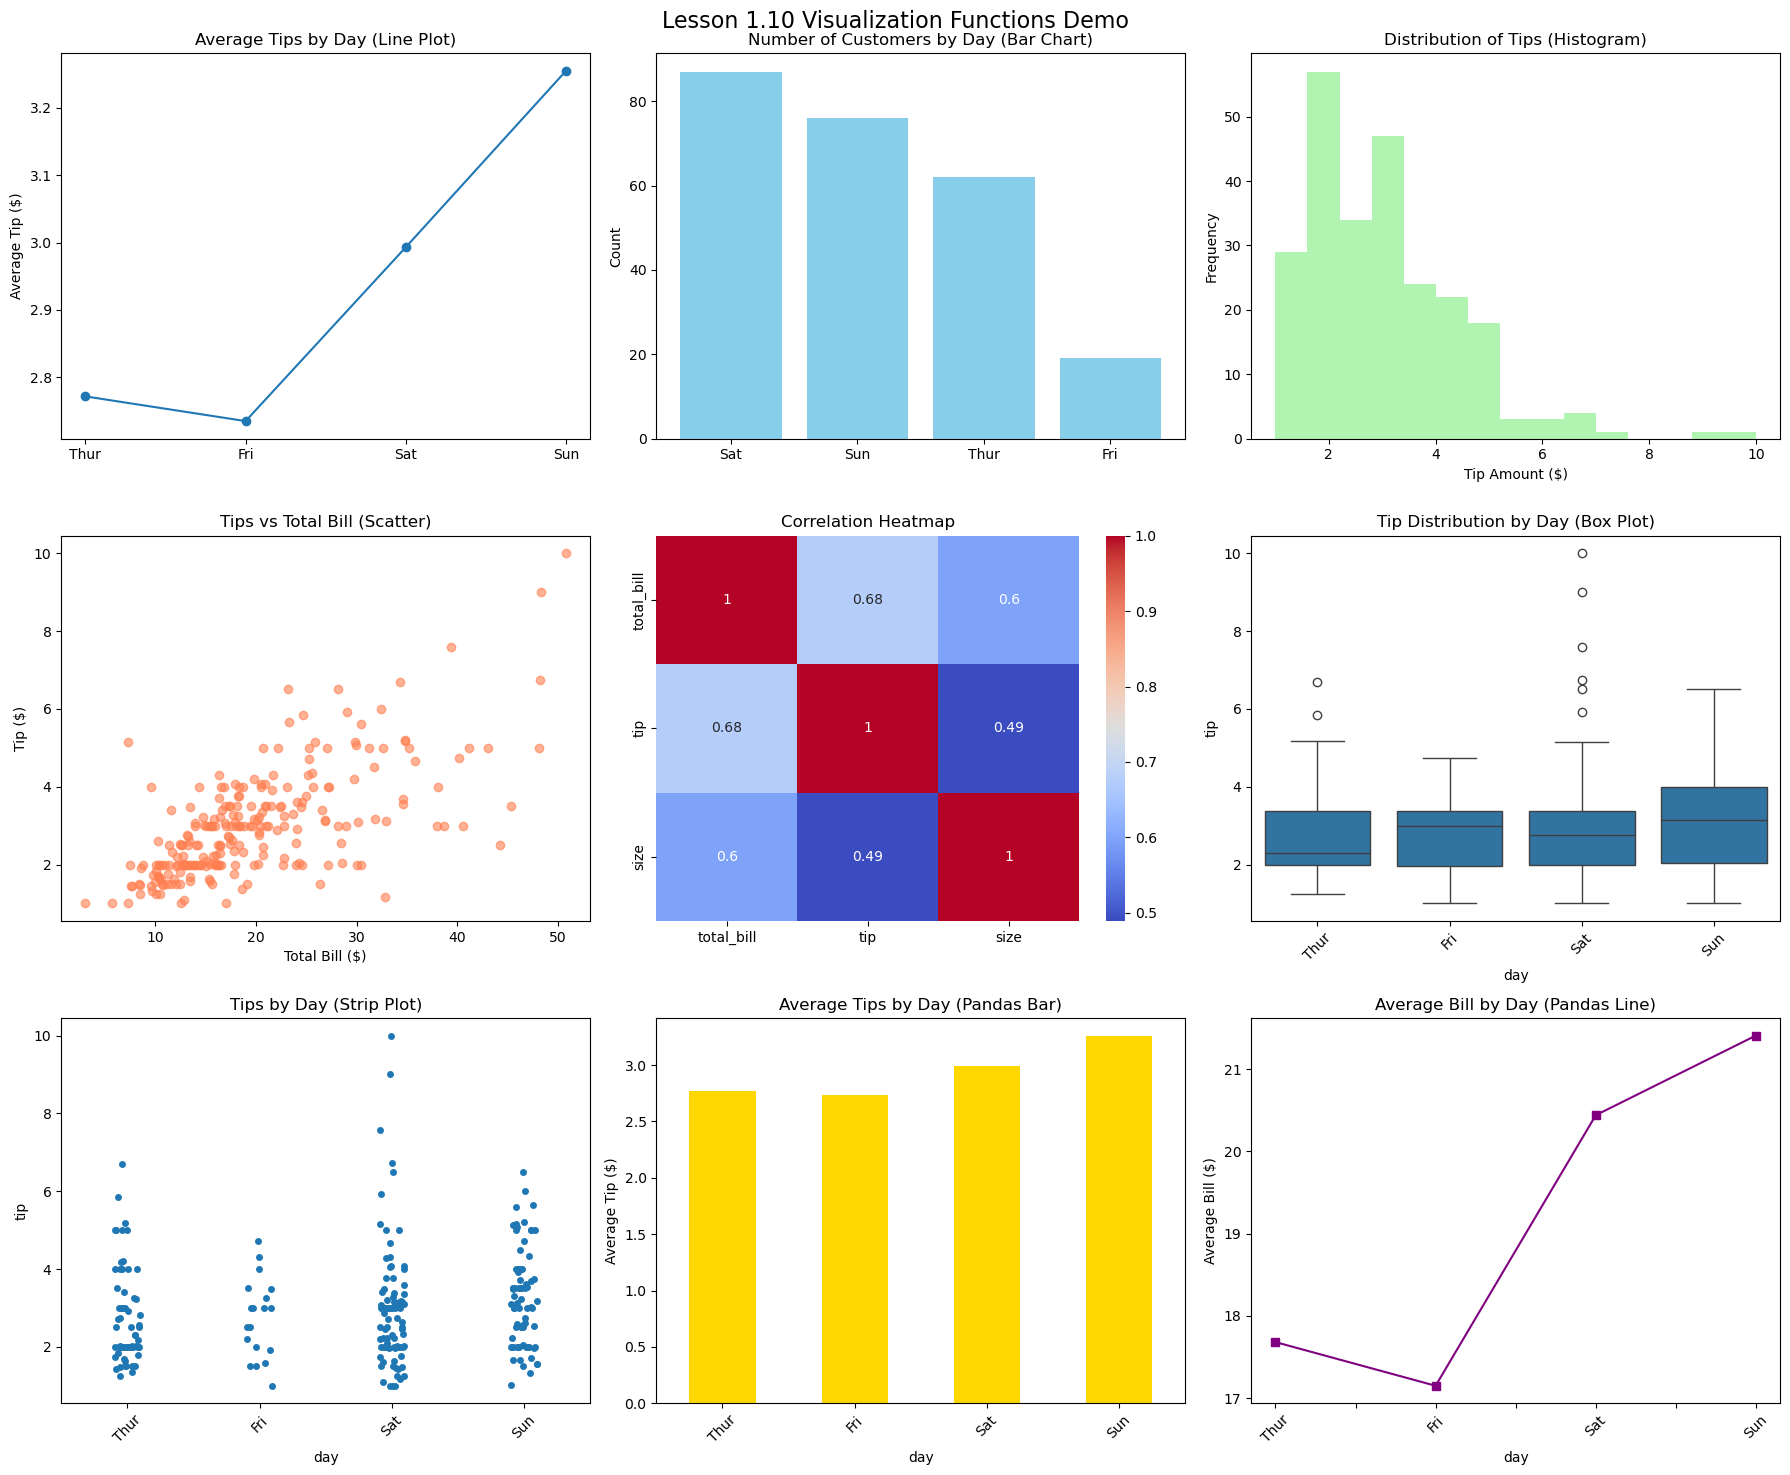


=== SEABORN FIGURE-LEVEL FUNCTIONS ===


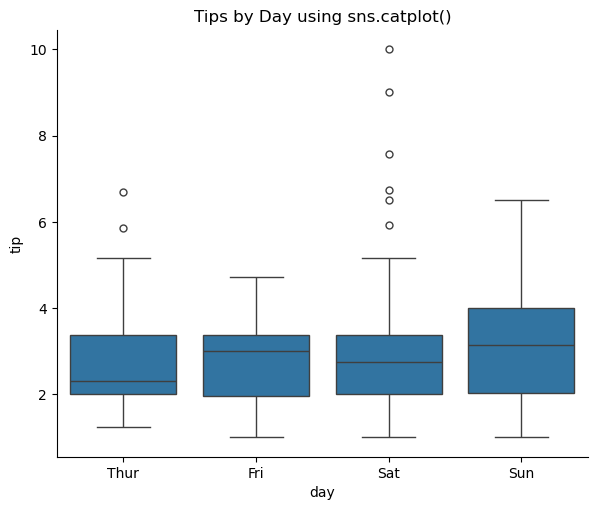

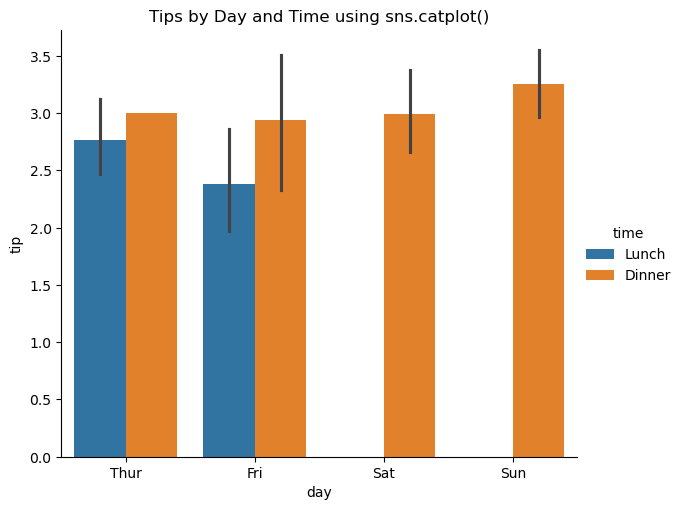

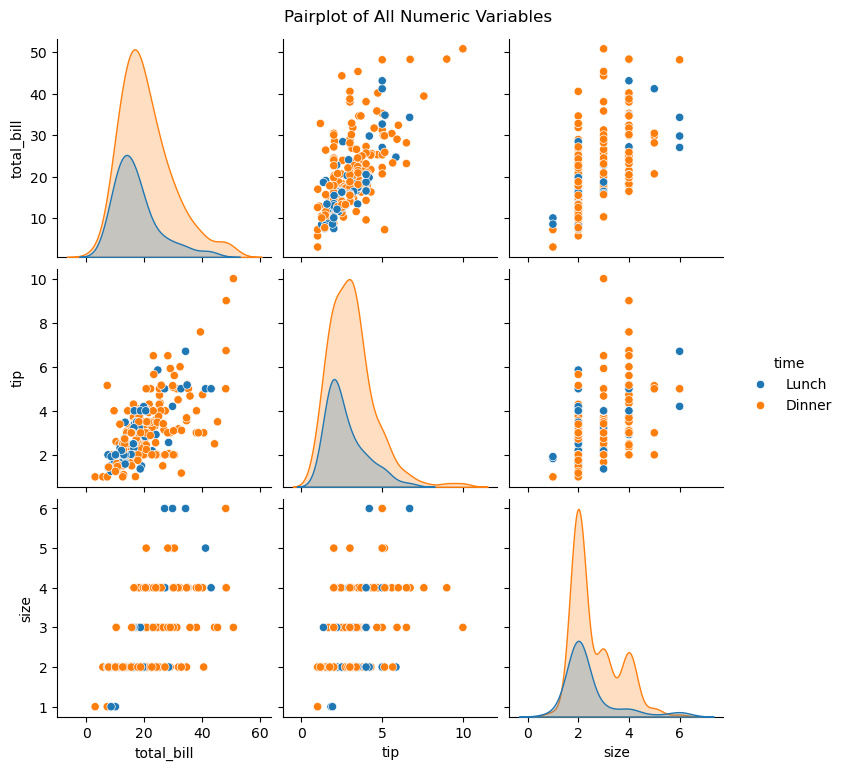


=== FUNCTIONS DEMONSTRATED (LESSON 1.10) ===
✓ matplotlib: plt.plot(), plt.bar(), plt.hist(), plt.scatter()
✓ seaborn: sns.heatmap(), sns.boxplot(), sns.catplot(), sns.pairplot()
✓ pandas: df.plot() with various kinds (bar, line)


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load sample dataset
tips = sns.load_dataset("tips")

# Create a comprehensive visualization layout
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Lesson 1.10 Visualization Functions Demo', fontsize=16)

# 1. MATPLOTLIB FUNCTIONS

# plt.plot() - Line plot showing trend
daily_avg_tips = tips.groupby('day', observed=False)['tip'].mean()
axes[0,0].plot(range(len(daily_avg_tips)), daily_avg_tips.values, marker='o')
axes[0,0].set_title('Average Tips by Day (Line Plot)')
axes[0,0].set_xticks(range(len(daily_avg_tips)))
axes[0,0].set_xticklabels(daily_avg_tips.index)
axes[0,0].set_ylabel('Average Tip ($)')

# plt.bar() - Bar chart
day_counts = tips['day'].value_counts()
axes[0,1].bar(day_counts.index, day_counts.values, color='skyblue')
axes[0,1].set_title('Number of Customers by Day (Bar Chart)')
axes[0,1].set_ylabel('Count')

# plt.hist() - Histogram for distribution
axes[0,2].hist(tips['tip'], bins=15, alpha=0.7, color='lightgreen')
axes[0,2].set_title('Distribution of Tips (Histogram)')
axes[0,2].set_xlabel('Tip Amount ($)')
axes[0,2].set_ylabel('Frequency')

# plt.scatter() - Scatter plot for relationships
axes[1,0].scatter(tips['total_bill'], tips['tip'], alpha=0.6, color='coral')
axes[1,0].set_title('Tips vs Total Bill (Scatter)')
axes[1,0].set_xlabel('Total Bill ($)')
axes[1,0].set_ylabel('Tip ($)')

# 2. SEABORN FUNCTIONS

# sns.heatmap() - Correlation matrix
numeric_cols = tips.select_dtypes(include=[np.number])
correlation = numeric_cols.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=axes[1,1])
axes[1,1].set_title('Correlation Heatmap')

# sns.boxplot() - Box plot for distributions
sns.boxplot(data=tips, x='day', y='tip', ax=axes[1,2])
axes[1,2].set_title('Tip Distribution by Day (Box Plot)')
axes[1,2].tick_params(axis='x', rotation=45)

# sns.catplot() - This creates its own figure, so we'll show it separately
# For now, let's use a seaborn categorical plot in the subplot
sns.stripplot(data=tips, x='day', y='tip', ax=axes[2,0])
axes[2,0].set_title('Tips by Day (Strip Plot)')
axes[2,0].tick_params(axis='x', rotation=45)

# 3. PANDAS PLOTTING FUNCTIONS

# df.plot() - Bar plot using pandas
daily_avg_tips.plot(kind='bar', ax=axes[2,1], color='gold')
axes[2,1].set_title('Average Tips by Day (Pandas Bar)')
axes[2,1].tick_params(axis='x', rotation=45)
axes[2,1].set_ylabel('Average Tip ($)')

# df.plot() - Line plot using pandas
tips.groupby('day', observed=False)['total_bill'].mean().plot(kind='line', 
                                              marker='s', 
                                              ax=axes[2,2], 
                                              color='purple')
axes[2,2].set_title('Average Bill by Day (Pandas Line)')
axes[2,2].tick_params(axis='x', rotation=45)
axes[2,2].set_ylabel('Average Bill ($)')

plt.tight_layout()
plt.show()

# sns.catplot() and sns.pairplot() - Figure-level functions (separate plots)

# sns.catplot() examples
print("\n=== SEABORN FIGURE-LEVEL FUNCTIONS ===")

# Box plot using catplot
sns.catplot(data=tips, x='day', y='tip', kind='box', height=5, aspect=1.2)
plt.title('Tips by Day using sns.catplot()')
plt.show()

# Bar plot with hue using catplot
sns.catplot(data=tips, x='day', y='tip', hue='time', kind='bar', height=5, aspect=1.2)
plt.title('Tips by Day and Time using sns.catplot()')
plt.show()

# sns.pairplot() - Pairwise relationships
sns.pairplot(tips, hue='time')
plt.suptitle('Pairplot of All Numeric Variables', y=1.02)
plt.show()

# Summary of functions used
print("\n=== FUNCTIONS DEMONSTRATED (LESSON 1.10) ===")
print("✓ matplotlib: plt.plot(), plt.bar(), plt.hist(), plt.scatter()")
print("✓ seaborn: sns.heatmap(), sns.boxplot(), sns.catplot(), sns.pairplot()")
print("✓ pandas: df.plot() with various kinds (bar, line)")
